# Lab Work 4 (student version): standard graph models

We can use the following libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import random
import time

from collections import deque # Used as queue
print(sys.version)

3.9.6 (default, Sep 19 2022, 09:09:38) 
[GCC 10.2.1 20210110]


This lab work will spread over sessions 5 and 6. 

## Exercise 1: Preliminary work

### Question 1

Download the graph as_caida.txt (CAIDA) on Moodle and load it in memory as a dictionary of lists (as usual). This graph is a partial map of the Internet at the AS level as obtained using BGP tables during the CAIDA project in 2007. 

Download also the graph ip_inet.txt (INET) on Moodle and load it in memory as a dictionary of lists. This graph is a partial map of the Internet at the IP level. 

Both will be used during the rest of this practical work. 

Apply the codes seen in the previous labs to:
- count its number of nodes and links, 
- plot its degree distribution,
- compute its number of triangles,
- give an approximation of its diameter.


In [2]:
# Code taken from our TP1

def load_graph(filename):
    # Initialize an empty dictionary for the adjacency list.
    adjacency_list = {}
    
    # Open the specified file for reading.
    with open(filename, 'r') as file:
        # Loop through each line in the file.
        for line in file:
            # Check if the line does not start with '#' (comments)
            if not line.startswith('#'):
                # Split the line into two nodes representing an edge.
                edge_info = line.strip().split()
                node1, node2 = edge_info[0], edge_info[1]
                # Check if node1 is not already in the adjacency list.
                if node1 not in adjacency_list:
                    # Initialize an empty list for node1 in the adjacency list.
                    adjacency_list[node1] = []
                # Check if node2 is not already in the adjacency list.
                if node2 not in adjacency_list:
                    # Initialize an empty list for node2 in the adjacency list.
                    adjacency_list[node2] = []
                # Add node2 to the adjacency list of node1 (representing an undirected edge).
                adjacency_list[node1].append(node2)
                # Add node1 to the adjacency list of node2 (since it's an undirected edge).
                adjacency_list[node2].append(node1)

    # Return the adjacency list representing the undirected graph.
    return adjacency_list

In [3]:
# Code taken from our TP1

def count_nodes_edges(filename):
    # Initialize an empty set to store unique nodes
    nodes = set()
    # Initialize a variable to count the number of edges
    edges = 0

    # Open the specified file in read ('read only') mode
    with open(filename, 'r') as file:
        # Iterate through each line in the file
        for line in file:
            # Remove leading and trailing whitespace and split the line into parts
            edge_info = line.strip().split()
            # Check if the line does not contain exactly two values (node identifiers)
            if len(edge_info) != 2:
                # Skip lines that don't have two values, they might be comments or errors
                continue
            # Add both node identifiers to the 'nodes' set
            nodes.update(edge_info)
            # Increment the edge count
            edges += 1

    # Calculate the number of unique nodes by finding the length of the 'nodes' set
    num_nodes = len(nodes)
    # final count for edges
    num_edges = edges

    # Return the counts of nodes and edges as a tuple
    return num_nodes, num_edges

In [4]:
# Code taken from our TP1

def test_count_nodes_edges(filename):
    start_time = time.time()
    num_nodes, num_edges = count_nodes_edges(filename)
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Nodes and edges counted in {time.time() - start_time:.5f} seconds")

In [5]:
# Code taken from our TP1

def compute_degree_distribution(adjacency_list):
    # Initialize an empty dictionary to store the degree distribution.
    degree_distribution = {}
    
    # Iterate through each node in the adjacency list along with its neighbors.
    for node, neighbors in adjacency_list.items():
        # Calculate the degree of the current node by finding the number of its neighbors.
        degree = len(neighbors)
        # Check if the degree already exists as a key in the degree_distribution dictionary.
        if degree in degree_distribution:
            # If it exists, increment the count for that degree by 1.
            degree_distribution[degree] += 1
        else:
            # If it doesn't exist, add it to the degree_distribution dictionary with a count of 1.
            degree_distribution[degree] = 1
    
    # Return the degree_distribution dictionary, which represents the degree distribution of nodes
    # in the input graph, where keys are degrees, and values are the number of nodes with that degree.
    return degree_distribution

In [6]:
def plot_degree_distribution(adjacency_list):
    degree_distribution = compute_degree_distribution(adjacency_list)

    # Extract degrees and counts for plotting.
    degrees = list(degree_distribution.keys())
    counts = list(degree_distribution.values())
    
    # Set the y-axis to a logarithmic scale for better visualization.
    plt.yscale('log')
    # Set the x-axis to a logarithmic scale for better visualization.
    plt.xscale('log')

    # Plot the degree distribution with adjusted axis limits.
    plt.scatter(degrees, counts, color='skyblue')
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes')
    plt.title('Degree Distribution of the Graph')

    plt.show()

In [7]:
# Code taken from our TP2

def improved_triangle_counting(graph):
    # Initialize a counter for the number of triangles
    nb = 0

    # Iterate over all edges (u, v) where u < v
    for u in set(graph):
        for v in set(graph[u]):
            # Ensure u is less than v to avoid duplicate counts
            if u < v:
                # Find common neighbors of u and v
                common_neighbors = set(graph[u]) & set(graph[v])
                # Iterate over common neighbors (w) where v < w
                for w in common_neighbors:
                    if v < w:
                        # Increment the triangle counter
                        nb += 1

    # Return the total count of triangles
    return nb

In [8]:
# Code taken from our TP2

def test_improved_triangle_count(graph):
    start_time = time.time()
    result = improved_triangle_counting(graph)
    print("Number of triangles:", result)
    print(f"Calculating triangle done in {time.time() - start_time:.5f} seconds")

In [9]:
def compute_distances(graph, start_node):
    # Check if the starting node exists in the graph
    if start_node not in graph: # In case someone decides to be funny and use a non-existing node
        print(f"<!>Error<!>: The starting node '{start_node}' not found in the graph.")
        print(f"<!>Error<!>: Are you sure you didn't make a typo?")
        return
    
    # Initialize a dictionary to store distances from the start node to other nodes
    distances = {}
    # Initialize a deque (double-ended queue) and add the starting node
    queue = deque()
    queue.append(start_node)
    # Set the distance from the start node to itself to be 0
    distances[start_node] = 0

    # Main BFS loop to compute distances
    while queue:
        # Get the current node from the front of the queue
        current_node = queue.popleft()
        # Iterate through neighbors of the current node
        for neighbor in graph[current_node]:
            # Check if the neighbor has not been assigned a distance
            if neighbor not in distances:
                # Add the neighbor to the queue
                queue.append(neighbor)
                # Set the distance from the start node to the neighbor
                distances[neighbor] = distances[current_node] + 1

    # Return the computed distances
    return distances

In [10]:
def lower_bound_diameter(graph, sample_size=None):
    # Initialize the lower bound to 0
    lower_bound = 0

    # If sample_size is None, use all nodes for BFS, otherwise, use a sample
    nodes_to_sample = list(graph.keys())

    # If a sample size is specified and greater than 0
    if sample_size is not None and sample_size > 0:
        # Ensure that the sample size is not greater than the population size
        sample_size = min(sample_size, len(nodes_to_sample))
        # Randomly sample nodes for BFS
        nodes_to_sample = random.sample(nodes_to_sample, sample_size)

    # Compute distances for sampled nodes in a single BFS traversal
    all_distances = {}
    for start_node in nodes_to_sample:
        # Use a BFS to compute distances from the start node to all other nodes
        distances = compute_distances(graph, start_node)
        all_distances[start_node] = distances

    # Iterate over each node to determine eccentricity
    for start_node, distances in all_distances.items():
        # Find the maximum distance, representing the eccentricity of the node
        eccentricity = max(distances.values())
        # Update the lower bound if the eccentricity is greater
        lower_bound = max(lower_bound, eccentricity)

    # Return the computed lower bound for the diameter
    return lower_bound

In [11]:
def test_lower_bound_diameter(graph, sample_size=None):
    start_time = time.time()
    lower_bound = lower_bound_diameter(graph, sample_size=sample_size)
    print(f"Lower bound for diameter: {lower_bound}")
    print(f"Calculating lower bound done in {time.time() - start_time:.5f} seconds")

In [12]:
filename = 'as_caida.txt'
result = test_count_nodes_edges(filename)

Number of nodes: 26475
Number of edges: 53381
Nodes and edges counted in 0.03359 seconds


In [13]:
filename = 'as_caida.txt'
start_time = time.time()
caida_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.04436 seconds


In [14]:
degree_distribution = compute_degree_distribution(caida_graph)
print(degree_distribution)

{3: 2509, 227: 1, 2: 10465, 913: 1, 518: 1, 1631: 1, 2628: 1, 999: 1, 271: 1, 176: 1, 47: 6, 239: 1, 14: 62, 42: 8, 9: 129, 59: 2, 1: 9937, 50: 3, 7: 237, 30: 11, 4: 1028, 6: 341, 36: 7, 11: 98, 5: 535, 49: 6, 34: 7, 13: 60, 8: 171, 16: 40, 19: 35, 12: 75, 564: 2, 26: 14, 405: 1, 497: 1, 1699: 1, 2052: 1, 113: 1, 290: 1, 292: 1, 89: 2, 615: 1, 498: 1, 1677: 1, 220: 1, 308: 1, 319: 1, 177: 1, 311: 1, 695: 1, 20: 32, 61: 3, 124: 1, 40: 7, 222: 1, 169: 2, 72: 2, 233: 2, 95: 1, 135: 1, 540: 1, 10: 128, 156: 2, 143: 1, 327: 2, 417: 1, 142: 1, 487: 1, 52: 7, 159: 1, 38: 8, 45: 9, 31: 10, 96: 2, 17: 44, 35: 11, 102: 1, 128: 1, 23: 21, 71: 6, 99: 2, 24: 19, 21: 21, 15: 41, 27: 11, 469: 1, 129: 1, 198: 2, 426: 1, 437: 1, 111: 2, 37: 6, 68: 2, 88: 2, 182: 1, 109: 2, 51: 6, 56: 5, 104: 2, 67: 4, 127: 1, 190: 1, 53: 3, 282: 1, 22: 24, 32: 9, 33: 4, 25: 13, 28: 14, 94: 1, 65: 2, 44: 3, 82: 2, 78: 1, 18: 36, 43: 8, 83: 5, 29: 13, 58: 2, 91: 2, 184: 1, 1272: 1, 63: 4, 114: 1, 41: 8, 60: 2, 77: 2, 66:

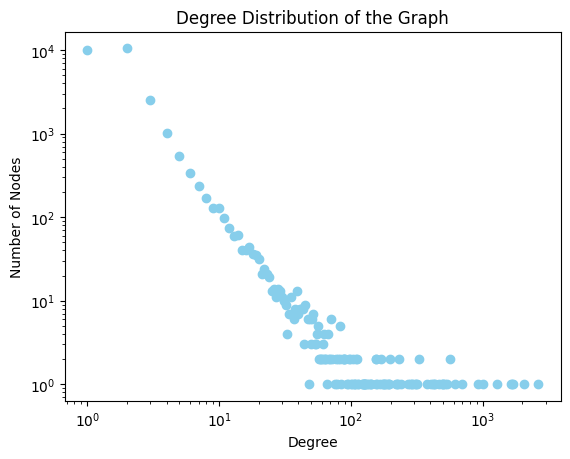

In [15]:
plot_degree_distribution(caida_graph)

In [16]:
graph = caida_graph
result = test_improved_triangle_count(graph)

Number of triangles: 36365
Calculating triangle done in 0.93248 seconds


In [17]:
graph = caida_graph
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 17
Calculating lower bound done in 14.14063 seconds


In [18]:
filename = 'ip_inet.txt'
result = test_count_nodes_edges(filename)

Number of nodes: 9740
Number of edges: 35567
Nodes and edges counted in 0.02279 seconds


In [19]:
filename = 'ip_inet.txt'
start_time = time.time()
inet_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.03453 seconds


In [20]:
degree_distribution = compute_degree_distribution(inet_graph)
print(degree_distribution)

{4: 740, 7: 326, 20: 40, 1: 1963, 3: 1121, 5: 466, 2: 2093, 11: 167, 6: 412, 9: 217, 8: 273, 27: 37, 17: 98, 16: 88, 14: 111, 10: 191, 12: 141, 13: 158, 15: 126, 19: 51, 22: 53, 40: 6, 39: 10, 23: 17, 26: 25, 24: 8, 32: 31, 18: 106, 28: 40, 31: 68, 30: 8, 58: 5, 57: 53, 21: 31, 35: 34, 25: 30, 36: 8, 41: 68, 37: 33, 33: 60, 29: 63, 44: 8, 43: 16, 45: 39, 52: 2, 51: 2, 54: 1, 38: 10, 47: 21, 50: 35, 42: 6, 34: 23, 53: 1}


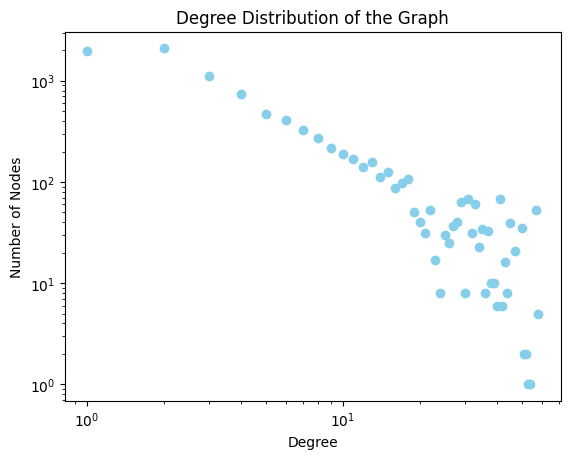

In [21]:
plot_degree_distribution(inet_graph)

In [22]:
graph = inet_graph
result = test_improved_triangle_count(graph)

Number of triangles: 206909
Calculating triangle done in 0.08588 seconds


In [23]:
graph = inet_graph
sample_size = 3000
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 34
Calculating lower bound done in 9.57214 seconds


## Exercise 2: Erdös-Rényi model

### Question 2

Create an Erdös-Rényi graph with the same number of nodes and links as the CAIDA graph. Same for the INET graph.

In [24]:
def erdos_renyi_graph_to_file(num_nodes, num_links, output_file):
    # Generate nodes
    nodes = list(range(num_nodes))

    # Generate links without self-loops or redundant links
    links = []
    for i in range(0, num_nodes - 1, 2):
        link = (i, i + 1)
        links.append(link)

    # If there are still links to make, link the last node to the first
    for i in range(num_links - len(links)):
        link = (i % (num_nodes - 1), (i % (num_nodes - 1)) + 1)
        links.append(link)

    # Write to file
    with open(output_file, 'w') as file:
        for link in links:
            file.write(f"{link[0]} {link[1]}\n")

In [25]:
num_nodes = 26475
num_links = 53381
output_file = 'erdos_renyi_caida_graph.txt'

erdos_renyi_graph_to_file(num_nodes, num_links, output_file)

In [26]:
filename = 'erdos_renyi_caida_graph.txt'
result = test_count_nodes_edges(filename)

Number of nodes: 26475
Number of edges: 53381
Nodes and edges counted in 0.02350 seconds


In [27]:
num_nodes = 9740
num_links = 35567
output_file = 'erdos_renyi_inet_graph.txt'

erdos_renyi_graph_to_file(num_nodes, num_links, output_file)

In [28]:
filename = 'erdos_renyi_inet_graph.txt'
result = test_count_nodes_edges(filename)

Number of nodes: 9740
Number of edges: 35567
Nodes and edges counted in 0.01568 seconds


### Question 3

For both graphs, compare the degree distribution, the number of triangles, the approximate diameter (of the largest component) of the model to the ones of the original graph.

In [29]:
filename = 'erdos_renyi_caida_graph.txt'
start_time = time.time()
er_caida_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.06595 seconds


In [30]:
degree_distribution = compute_degree_distribution(er_caida_graph)
print(degree_distribution)

{3: 12804, 5: 13669, 4: 1, 1: 1}


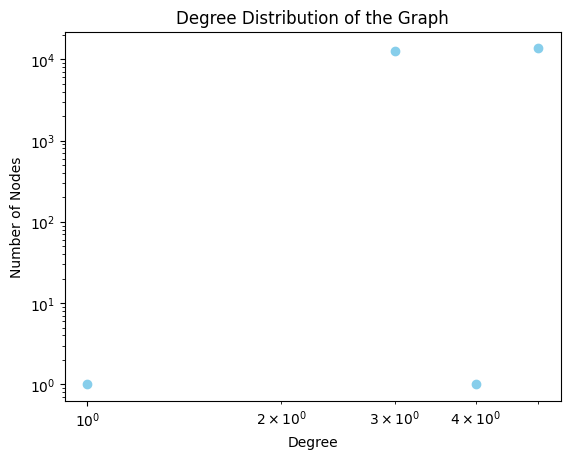

In [31]:
plot_degree_distribution(er_caida_graph)

In [32]:
graph = er_caida_graph
result = test_improved_triangle_count(graph)

Number of triangles: 0
Calculating triangle done in 0.02445 seconds


In [33]:
graph = er_caida_graph
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 26471
Calculating lower bound done in 14.36389 seconds


In [34]:
filename = 'erdos_renyi_inet_graph.txt'
start_time = time.time()
er_inet_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.02026 seconds


In [35]:
degree_distribution = compute_degree_distribution(er_inet_graph)
print(degree_distribution)

{5: 1, 9: 1479, 8: 1, 7: 8258, 4: 1}


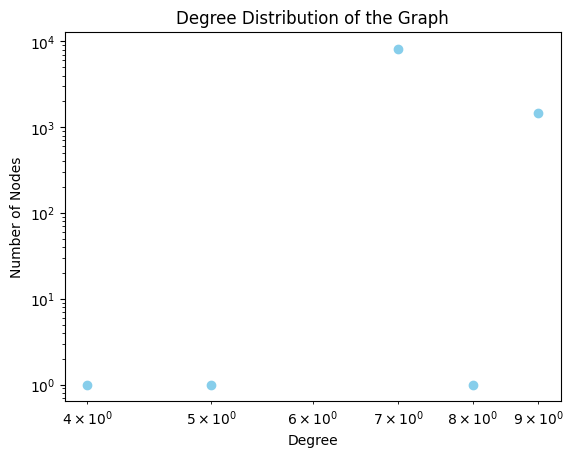

In [36]:
plot_degree_distribution(er_inet_graph)

In [37]:
graph = er_inet_graph
result = test_improved_triangle_count(graph)

Number of triangles: 0
Calculating triangle done in 0.00980 seconds


In [38]:
graph = er_inet_graph
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 9736
Calculating lower bound done in 6.24959 seconds


### Answer:

Sadly, event though the Erdös-Rényi model can replicate the exact number of nodes and links, it's not able to do the same for the number of triangles present in the generated graph, as we can see from the comparison just above.

## Exercise 3: Barabasi-Albert model


### Question 4

Create a Barabasi-Albert graph with a number of links and nodes comparable to the CAIDA graph. We remind that in a BA model with $n$ nodes, the number of links $m$ is (approximately) equal to $\alpha n$ where $ \alpha $ is the parameter of the model. 

Same question for the INET graph.

In [39]:
def barabasi_albert_graph(n, m, filename):
    """
    Generate a Barabasi-Albert graph and save it to a text file.

    Parameters:
    - n: Number of nodes
    - m: Number of edges to attach from a new node to existing nodes
    - filename: Name of the text file to save the graph

    Example:
    >>> barabasi_albert_graph(100, 3, 'barabasi_albert_graph.txt')
    """
    # Initialize the graph with a fully connected initial small graph (m0 nodes)
    graph = {i: set(range(i)) - {i} for i in range(m)}

    # Generate the Barabasi-Albert graph
    for new_node in range(m, n):
        # Calculate probabilities for attaching edges to existing nodes
        probabilities = [len(neighbors) for neighbors in graph.values()]
        total_prob = sum(probabilities)
        probabilities = [prob / total_prob for prob in probabilities]

        # Attach m edges to existing nodes based on probabilities
        selected_nodes = random.choices(list(graph.keys()), weights=probabilities, k=m)
        graph[new_node] = set(selected_nodes)
        for selected_node in selected_nodes:
            graph[selected_node].add(new_node)

    # Save the graph to a text file
    with open(filename, 'w') as file:
        for node, neighbors in graph.items():
            neighbors_str = ' '.join(map(str, neighbors))
            file.write(f"{node} {neighbors_str}\n")

In [40]:
barabasi_albert_graph(100, 3, 'barabasi_albert_graph.txt')

In [41]:
filename = 'barabasi_albert_graph.txt'
result = test_count_nodes_edges(filename)

Number of nodes: 0
Number of edges: 0
Nodes and edges counted in 0.00064 seconds


### Question 5

For both graphs, compare the degree distribution, the number of triangles, the approximate diameter (of the largest component) of the model to the ones of the original graph.

## Exercise 4: Watts-Strogatz model

### Question 6

Create a regular graph with a number of nodes $n$ equals to the one of the initial CAIDA graph. We have these constraints:

* all nodes of a regular graph have the same degree $k$, choose $k$ so that the number $m$ of edges is close to the one of the CAIDA graph,

* each node is connected to the nodes with the closest index, for example, if $k=6$, node $i$ will be connected to nodes $ i-1 $, $ i-2 $, $ i-3$ and $ i+1 $, $ i+2 $, $ i+3 $.

Same question for the INET graph.

### Question 7

Starting from the graph created in the previous question, generate Watts-Strogatz models with several values of the parameter $p$: 0.01, 0.1, 0.3.

### Question 8

For both graphs, compare the degree distribution, the number of triangles, the approximate diameter (of the largest component) of the model to the ones of the original graph.

## Exercise 5: configuration model

### Question 9

For both graphs, create a Configuration Model of the graph with the same degree sequence as the original graph.

Unfortunately, the version "with rejection" runs too slowly to be used here, so implement the version "with loops and multi-edges deletion" seen in the course.

### Question 10

For both CAIDA and INET graphs:

* Compare the initial degree distribution to the configuration model degree distribution. To do so, compute the fraction of nodes which degree in the model is different from their degree in the original distribution: $ \frac{n_{mod}}{n} $.

* Compare the number of triangles of the configuration model to the one of the original graph. In which case does it correspond to the result of the course? In the other case, can you propose an explanation?